<a href="https://colab.research.google.com/github/gabrielsperez/CIFAR-10-Classification/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3-Layer CCN Classifier using CIFAR10 Dataset**

1. The model was implemented and trained using Google Colab
2. The model uses the following Regularization techniques: L2 Regularization and Dropout
3. It uses the following Optimization techniques: Batch normalization and Adam algorithm
4. It uses He normal initializer.
5. It uses the following activation functions: ELU (Exponential Linear Unit) for the hidden layers and Softmax for the output layer

In [0]:
import keras
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


Load the dataset

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [0]:
print("Training set size:\t",len(x_train))
print("Testing set size:\t",len(x_test))

Training set size:	 50000
Testing set size:	 10000


Build the model

In [0]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation = 'elu', kernel_regularizer=regularizers.l2(1e-4), kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'elu', kernel_regularizer=regularizers.l2(1e-4), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    return model

In [0]:
model = build_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2

Configure the model for training

In [0]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Fit the model

In [0]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=200,
              validation_data=(x_test, y_test),
              shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 14s 290us/step - loss: 1.6887 - acc: 0.4081 - val_loss: 1.8362 - val_acc: 0.3670
Epoch 2/200
50000/50000 [==============================] - 12s 242us/step - loss: 1.4341 - acc: 0.5080 - val_loss: 1.3452 - val_acc: 0.5343
Epoch 3/200
50000/50000 [==============================] - 12s 241us/step - loss: 1.3411 - acc: 0.5432 - val_loss: 1.3543 - val_acc: 0.5351
Epoch 4/200
50000/50000 [==============================] - 12s 238us/step - loss: 1.2785 - acc: 0.5689 - val_loss: 1.2565 - val_acc: 0.5715
Epoch 5/200
50000/50000 [==============================] - 12s 235us/step - loss: 1.2337 - acc: 0.5851 - val_loss: 1.1732 - val_acc: 0.6099
Epoch 6/200
50000/50000 [==============================] - 12s 235us/step - loss: 1.1913 - acc: 0.6039 - val_loss: 1.1817 - val_acc: 0.6051
Epoch 7/200
50000/50000 [==============================] - 12s

Print the validation accuracy

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.17%


Model accuracy and loss plots

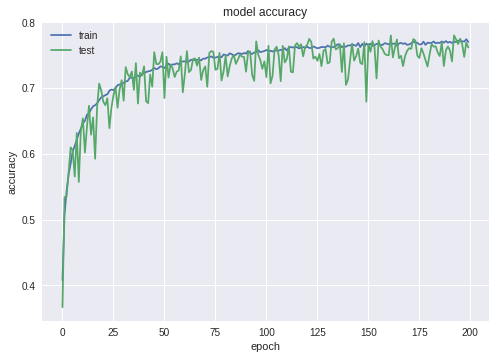

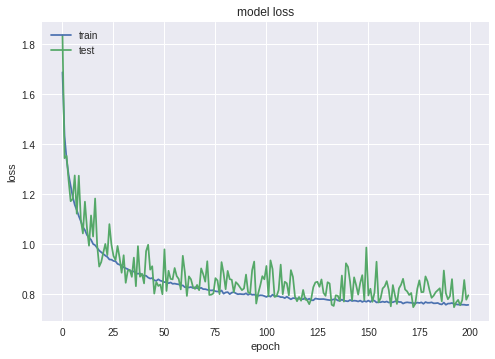

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()